# **Project Name**    -  **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised ML (Clustering)
##### **Contribution**    - Individual


# **Problem Summery**


Netflix, Inc. is an American subscription video on-demand over-the-top streaming service and production company based in Los Gatos, California. Founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals.

In this project,i have done following things:-

* Exploratory Data Analysis.

* Understanding what type content is available in different countries.

* Is Netflix has increasingly focusing on TV rather than movies in recent years.

* Clustering similar content by matching text-based features.

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:

# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unsupervised Machine Learning/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First 
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns 
dataset.shape

(7787, 12)

### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<Axes: >

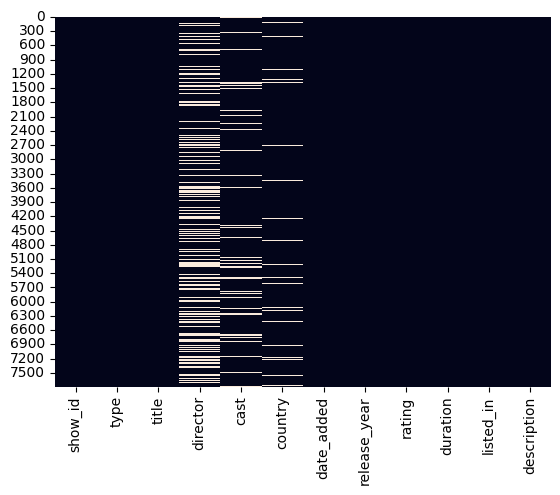

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating. so we need to handle the null values .

## ***2. Understanding Your Variables***

In [10]:
df = dataset.copy()

In [11]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

* **show_id** : Unique ID for every Movie / Tv Show

* **type** : Identifier - A Movie or TV Show

* **title** : Title of the Movie / Tv Show

* **director** : Director of the Movie

* **cast** : Actors involved in the movie / show

* **country** : Country where the movie / show was produced

* **date_added** : Date it was added on Netflix

* **release_year** : Actual Releaseyear of the movie / show

* **rating** : TV Rating of the movie / show

* **duration** : Total Duration - in minutes or number of seasons

* **listed_in** : Genere

* **description**: The Summary description

### Handling Missing Values 

In [13]:
#Handling Null Values
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [14]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'],inplace=True)
     

In [15]:
#Dropping Director Column
df.drop(['director'],axis=1,inplace=True)

In [16]:

#again checking is there any null values are not
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


In [18]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7770,7770,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7770,2,Movie,5372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7770,7770,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7770,6818,No cast,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7770,681,United States,3051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7770,1563,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7770.0,NaN,NaN,NaN,2013.935393,8.764357,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7770,14,TV-MA,2861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7770,216,1 Season,1606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listed_in,7770,491,Documentaries,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [21]:
# 1. checking the variable type
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

In [22]:
#2 Top 6 countries having more content in netflix
df['country'].value_counts()[:6]

United States     3051
India              923
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Name: country, dtype: int64

In [23]:
#3 Release year of the content
df['release_year'].value_counts()[:10]

2018    1120
2017    1010
2019     996
2016     881
2020     868
2015     536
2014     334
2013     265
2012     218
2010     171
Name: release_year, dtype: int64

In [24]:
#4 checking the rating of the content
df['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [25]:
#5 checking the listed in (genre) of the content in netflix
df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

### What all manipulations have you done and insights you found?

I did few maipulations on the data and observed the following : <br>
* Number of movies (5372) are more than TV shows (2398)
* United states , India and UK have maximum content in the netflix .
* More number of mlvies are released in 2017 and 2018 .
* Maximum ratings are given to TV-MA and TV-14 .
* Top 3 genre listed in netflix are Documentaries , Stand-Up Comedy and Dramas, International Movies .



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [26]:
df1 = df.copy()

#### Chart - 1 - Count Plot on Type variable

In [27]:
df1['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

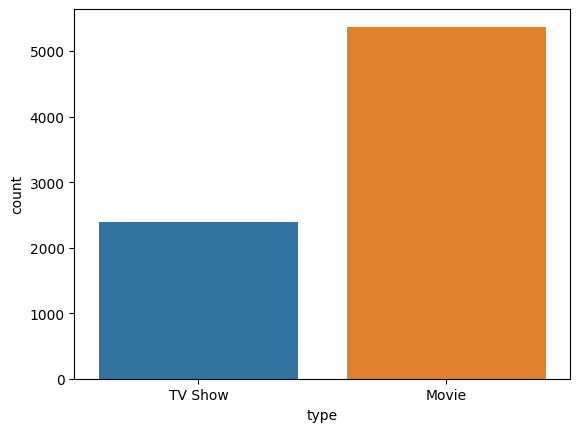

In [28]:
#countplot to visualize the number of movies and tv_shows in type column
sns.countplot(x=df1['type'])

##### 1. Why did you pick the specific chart?

countplot can count the number of occurrences of each category in a categorical variable and plot the counts as bars. This can help you quickly understand the distribution of the data and identify any imbalances or biases.
countplot can also group the counts of different categories and plot them side-by-side, which allows you to compare the frequencies of different categories easily. This is useful when you want to compare the frequency of different categories across a dataset or between different datasets.

##### 2. What is/are the insight(s) found from the chart?

* Netflix has 5372 movies and 2398 TV shows, there are more number movies on Netflix than TV shows.

#### Chart - 2 - Count Plot on Rating with hue Target_ages

In [29]:
df1['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [30]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [31]:
df1['target_ages'] = df1['rating'].replace(ratings)
df1['target_ages'].value_counts()

Adults        3617
Teens         2314
Older Kids    1327
Kids           512
Name: target_ages, dtype: int64

In [32]:
# type and target_ages should be categorical
df1['type'] = pd.Categorical(df1['type'])
df1['target_ages'] = pd.Categorical(df1['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [33]:
df1.head(2)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults


In [34]:
# create two extra columns
movies = df1[df1['type']=='Movie']
tv_shows = df1[df1['type']=='TV Show']
movies.shape[0] , tv_shows.shape[0]

(5372, 2398)

<Axes: xlabel='rating', ylabel='count'>

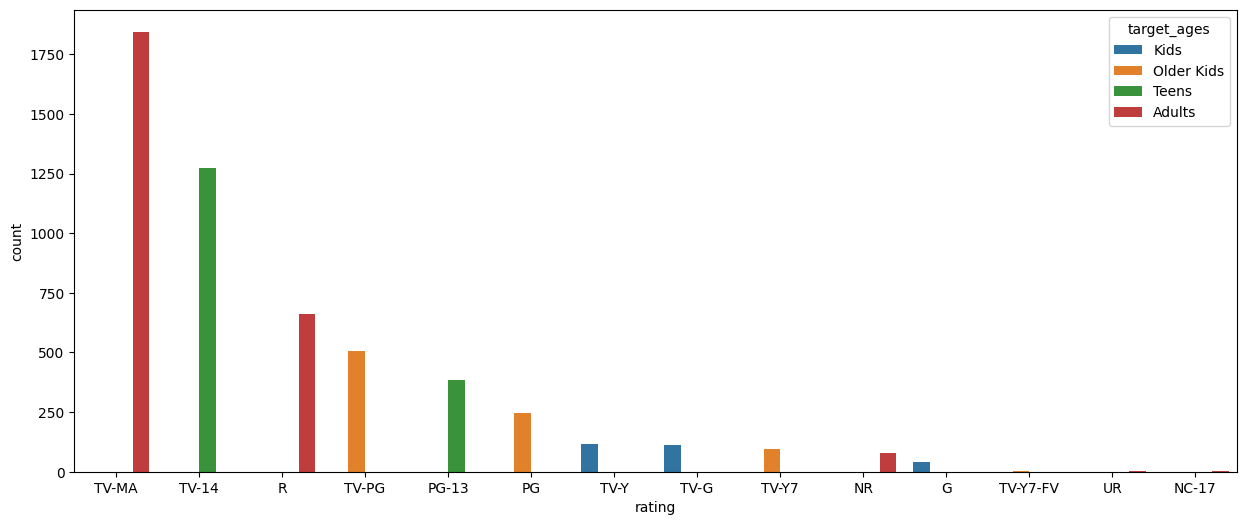

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(x=movies['rating'],hue=movies['target_ages'],order = movies['rating'].value_counts().index)

<Axes: xlabel='rating', ylabel='count'>

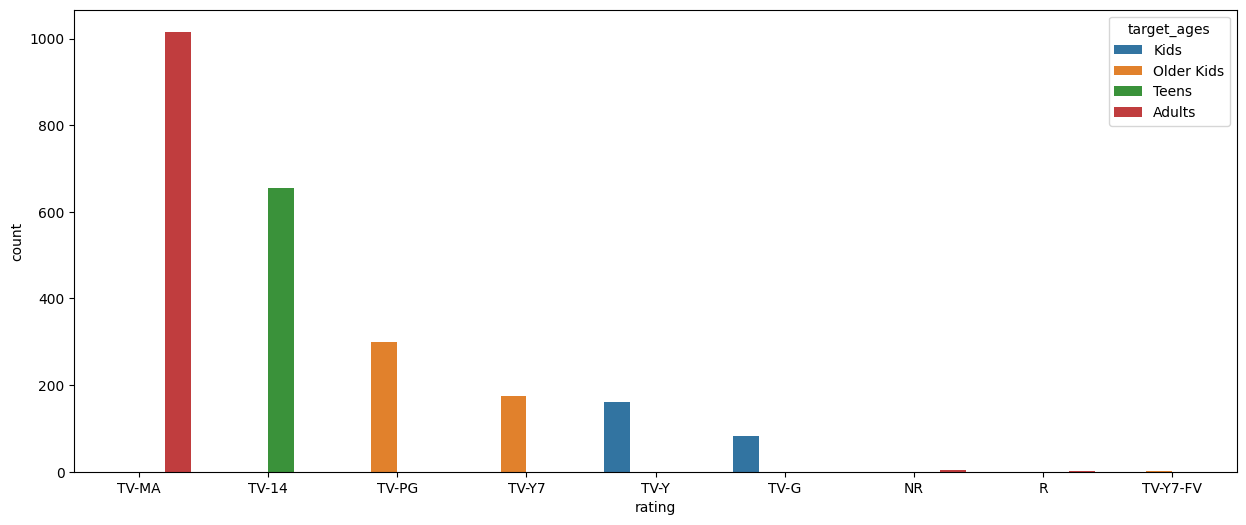

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(x=tv_shows['rating'],hue=tv_shows['target_ages'],order = tv_shows['rating'].value_counts().index)

##### 1. Why did you pick the specific chart?

countplot can count the number of occurrences of each category in a categorical variable and plot the counts as bars. This can help you quickly understand the distribution of the data and identify any imbalances or biases.
countplot can also group the counts of different categories and plot them side-by-side, which allows you to compare the frequencies of different categories easily. This is useful when you want to compare the frequency of different categories across a dataset or between different datasets.

##### 2. What is/are the insight(s) found from the chart?

* TV-MA has the highest number of ratings for tv shows i,e adult ratings in both the cases TV-MA has the highest number of ratings .

#### Chart - 3 - Plot and Count Plot  on Release_Year

In [37]:
movies_year = movies['release_year'].value_counts().sort_index(ascending=False)
tv_shows_year = tv_shows['release_year'].value_counts().sort_index(ascending=False)

Text(0.5, 1.02, 'Production growth yearly')

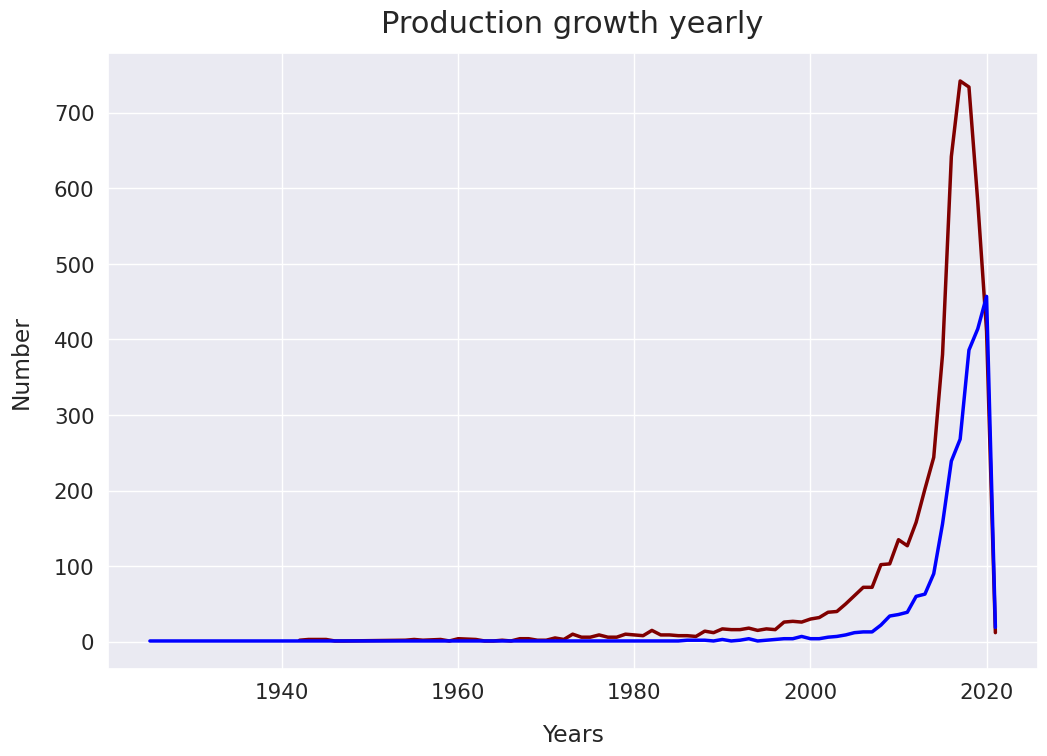

In [38]:
# visualizing the movies and tv_shows based on the release year
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
tv_shows_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22)
     

<Axes: xlabel='count', ylabel='release_year'>

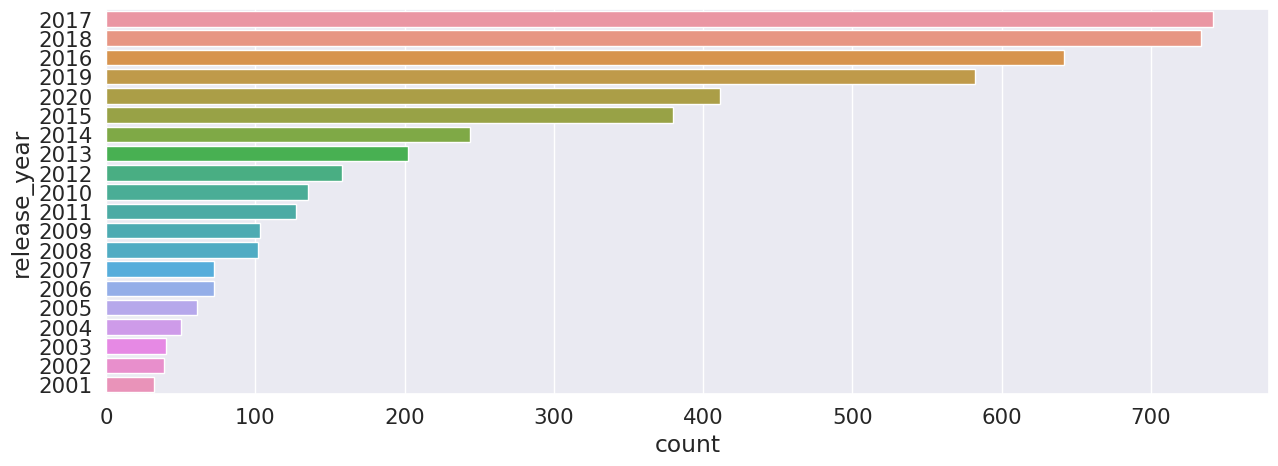

In [39]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=df1,order=movies['release_year'].value_counts().index[0:20])


<Axes: xlabel='count', ylabel='release_year'>

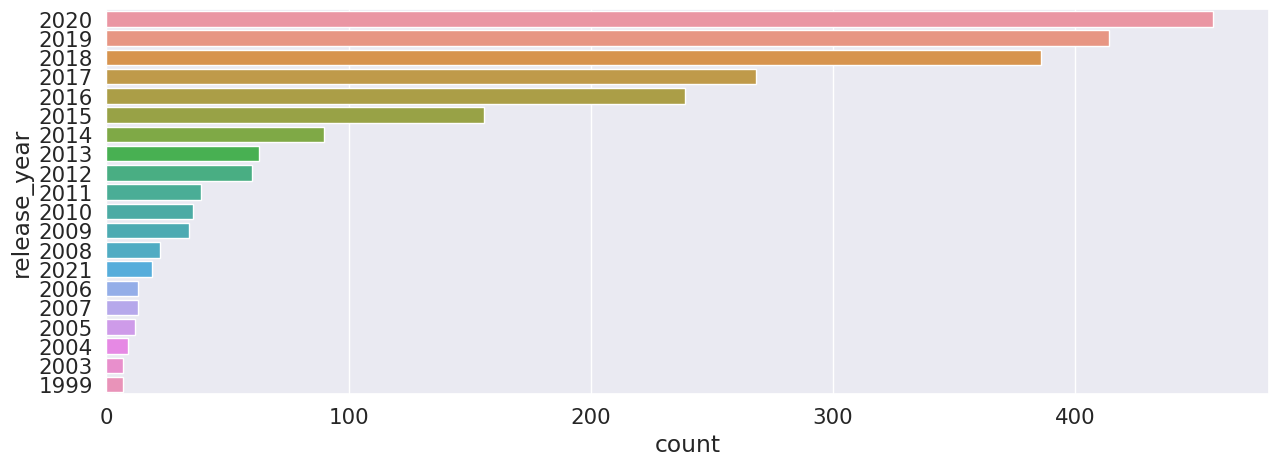

In [40]:
#Analysing how many movies released per year in last 15 years
plt.figure(figsize=(15,5))
sns.countplot(y=tv_shows['release_year'],data=df1,order=tv_shows['release_year'].value_counts().index[0:20])

##### 1. Why did you pick the specific chart?

countplot can count the number of occurrences of each category in a categorical variable and plot the counts as bars. This can help you quickly understand the distribution of the data and identify any imbalances or biases.
countplot can also group the counts of different categories and plot them side-by-side, which allows you to compare the frequencies of different categories easily. This is useful when you want to compare the frequency of different categories across a dataset or between different datasets.

##### 2. What is/are the insight(s) found from the chart?

* Highest number of movies released in 2017 and 2018
* Highest number of movies released in 2020
* The number of movies on Netflix is growing significantly faster than the number of TV shows.
* We saw a huge increase in the number of movies and television episodes after 2015.
* There is a significant drop in the number of movies and television episodes produced after 2020.
* It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows.





#### Chart - 4 - Count Plot on Month

In [41]:
#adding columns of month and year of addition

df1['month'] = pd.DatetimeIndex(df1['date_added']).month
df1.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


<Axes: xlabel='month', ylabel='count'>

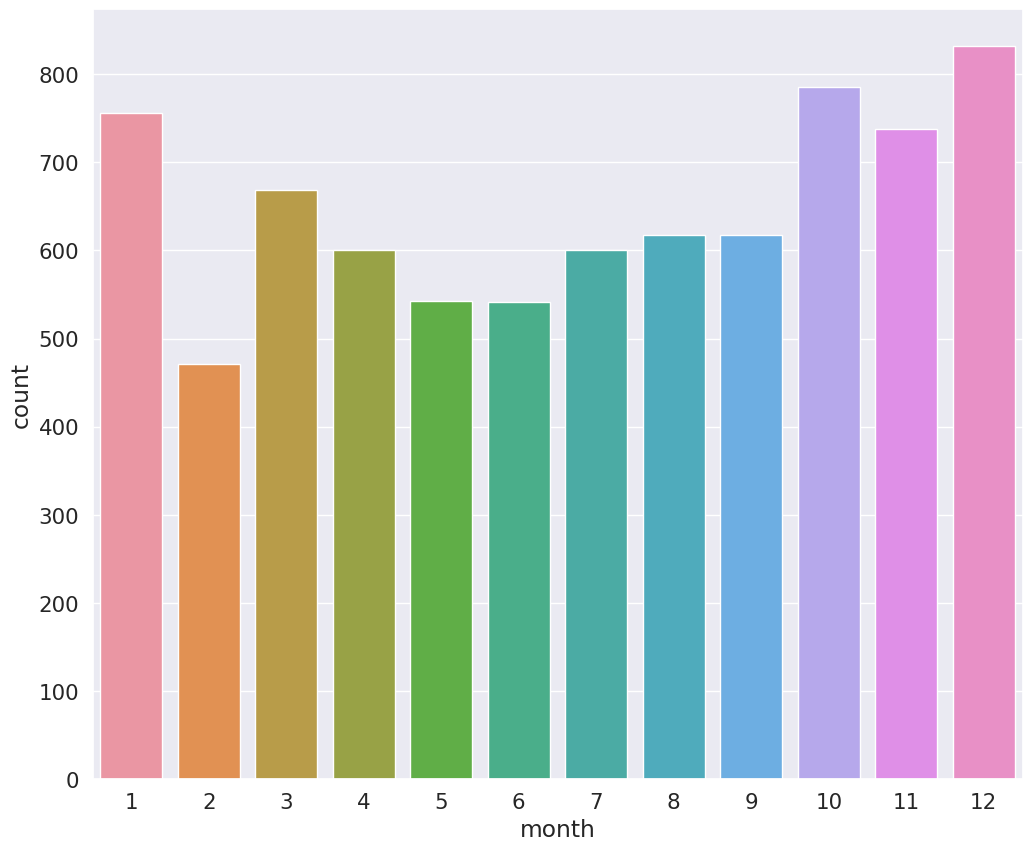

In [42]:

# Plotting the Countplot 
plt.figure(figsize=(12,10))
sns.countplot(x= df1['month'])

<Axes: xlabel='month', ylabel='count'>

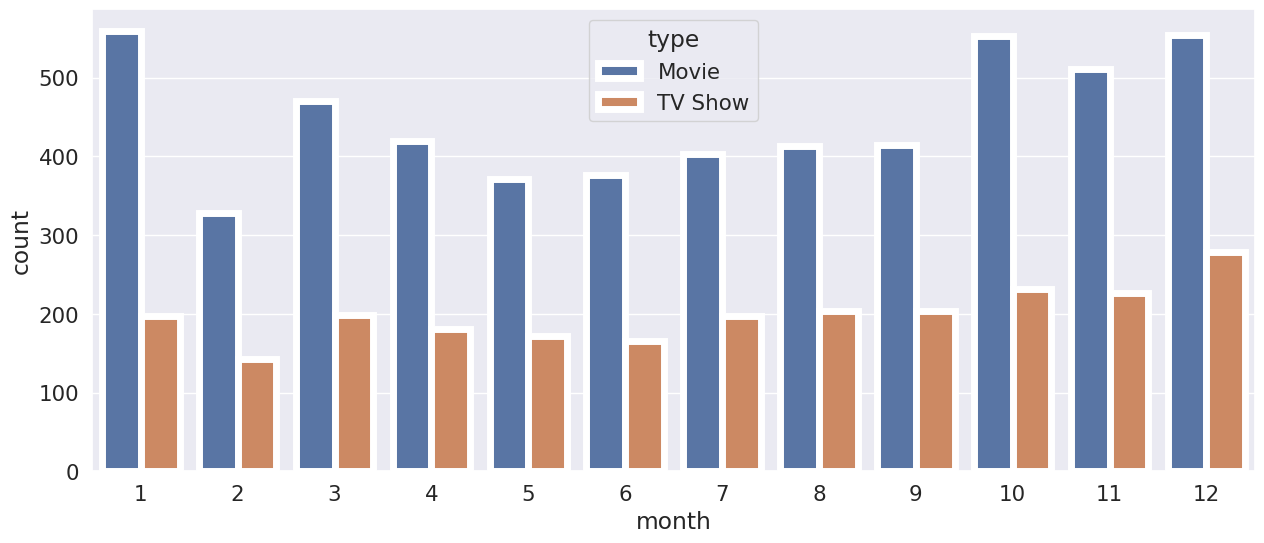

In [43]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='month', hue='type',lw=5, data=df1, ax=ax)

##### 1. Why did you pick the specific chart?

countplot can count the number of occurrences of each category in a categorical variable and plot the counts as bars. This can help you quickly understand the distribution of the data and identify any imbalances or biases.
countplot can also group the counts of different categories and plot them side-by-side, which allows you to compare the frequencies of different categories easily. This is useful when you want to compare the frequency of different categories across a dataset or between different datasets.

##### 2. What is/are the insight(s) found from the chart?

* From October to January, maximum number of movies and TV shows were added.
* The above graph shows that the most content is added to Netflix from october to january.

#### Chart - 5 - Count Plot on Listed_In (Genre)

<Axes: title={'center': 'Top10 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

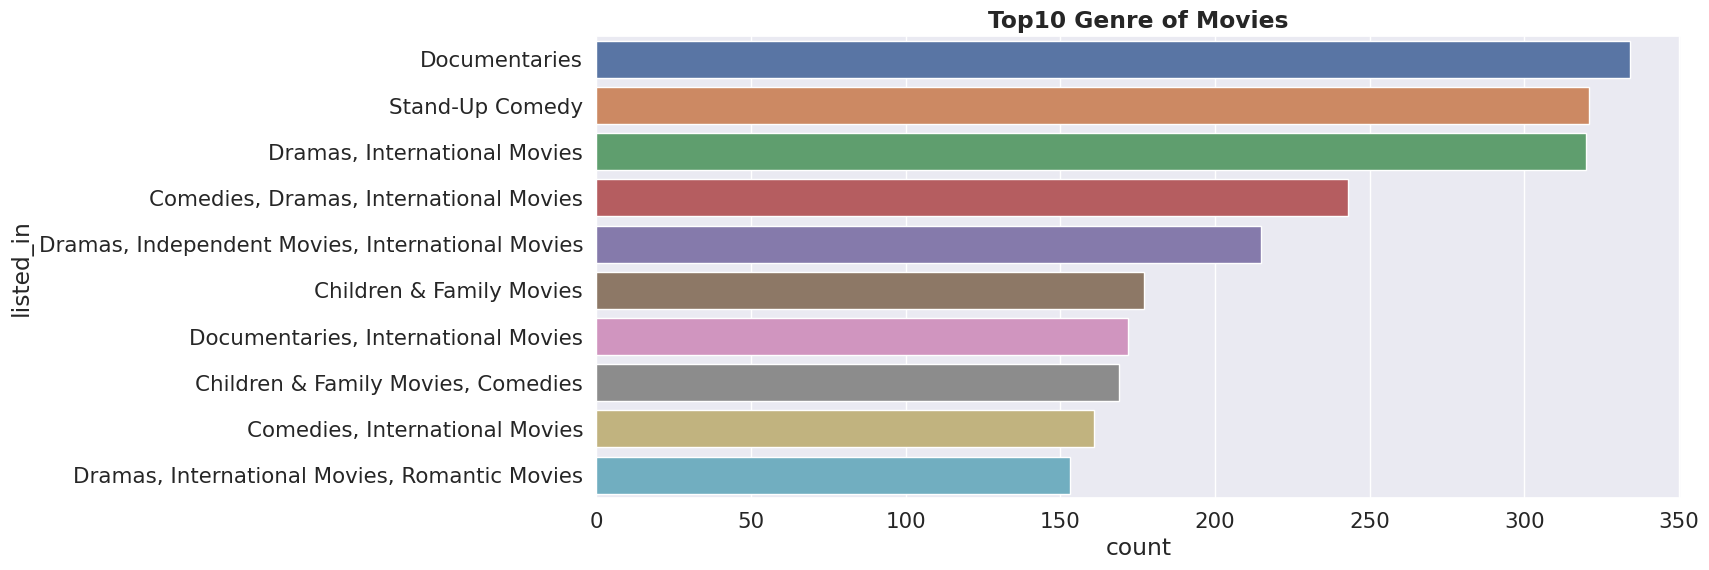

In [44]:
#Analysing top10 genre of the movies
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])


<Axes: title={'center': 'Top10 Genre of TV Shows'}, xlabel='count', ylabel='listed_in'>

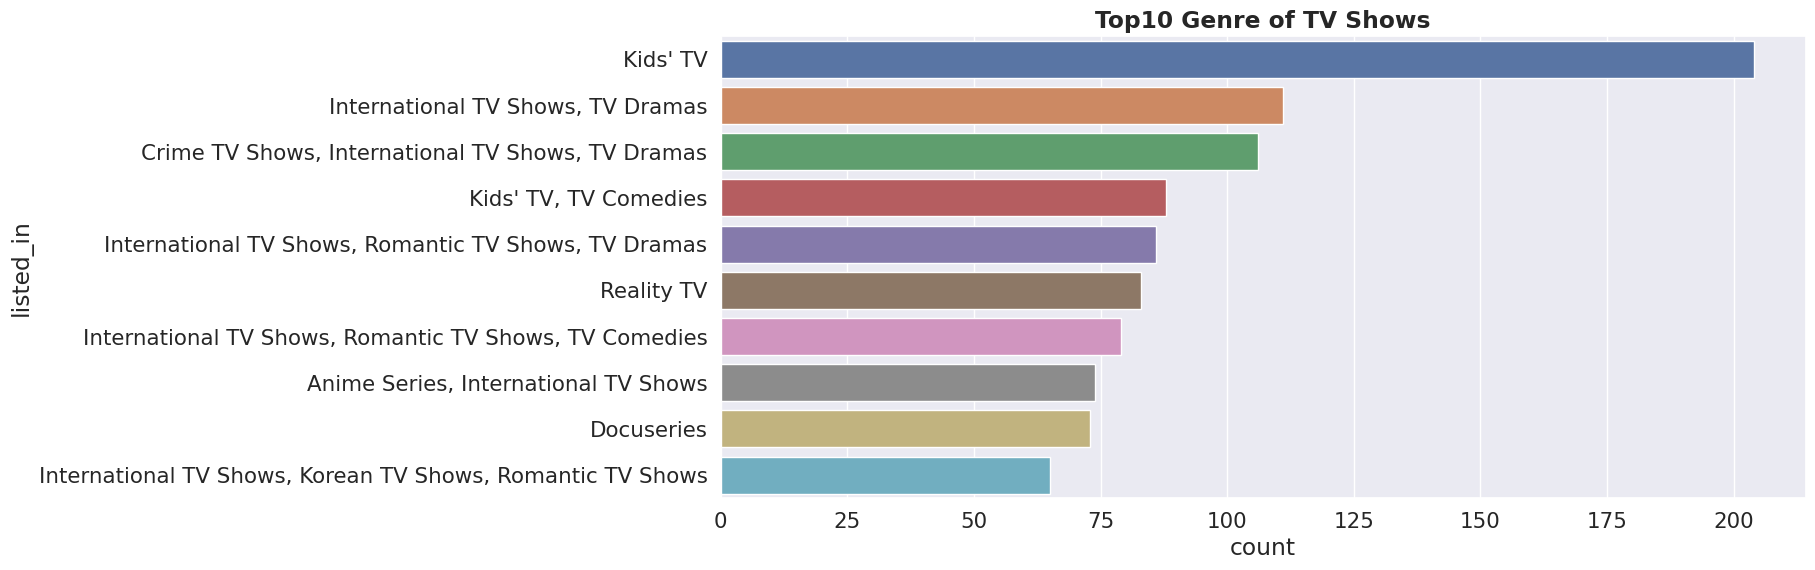

In [45]:

#Analysing top10 genres of TVSHOWS
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])

##### 1. Why did you pick the specific chart?

A bar chart is used when you want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data. From a bar chart, we can see which groups are highest or most common, and how other groups compare against the others.
countplot can count the number of occurrences of each category in a categorical variable and plot the counts as bars. This can help you quickly understand the distribution of the data and identify any imbalances or biases.
countplot can also group the counts of different categories and plot them side-by-side, which allows you to compare the frequencies of different categories easily. This is useful when you want to compare the frequency of different categories across a dataset or between different datasets.

##### 2. What is/are the insight(s) found from the chart?

* Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies .
* Kids tv is the top most TV show genre in netflix .


#### Chart - 6 - Dist Plot , Count Plot and Bar Plot on Duration .

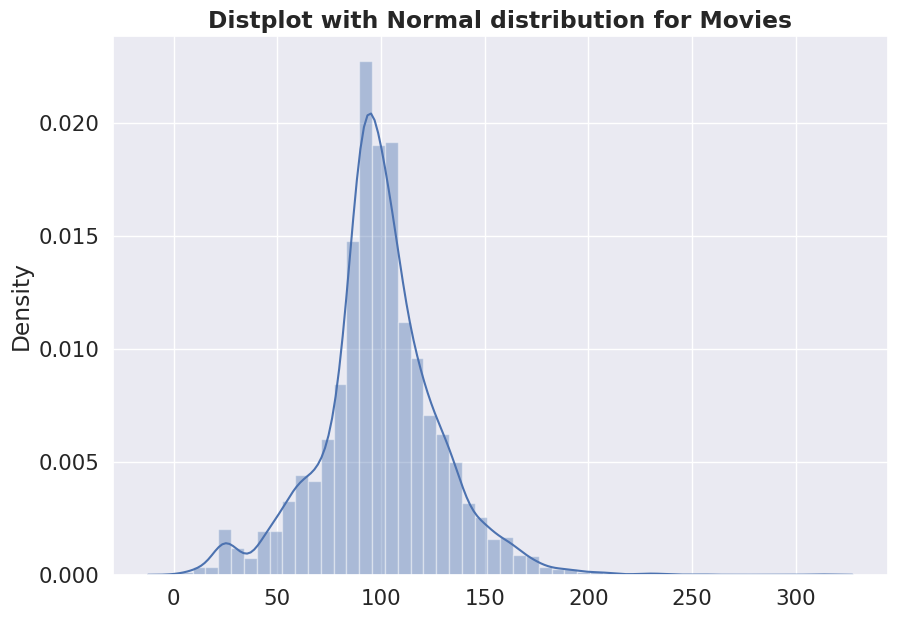

In [46]:

#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movies['duration'].str.extract('(\d+)'))
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

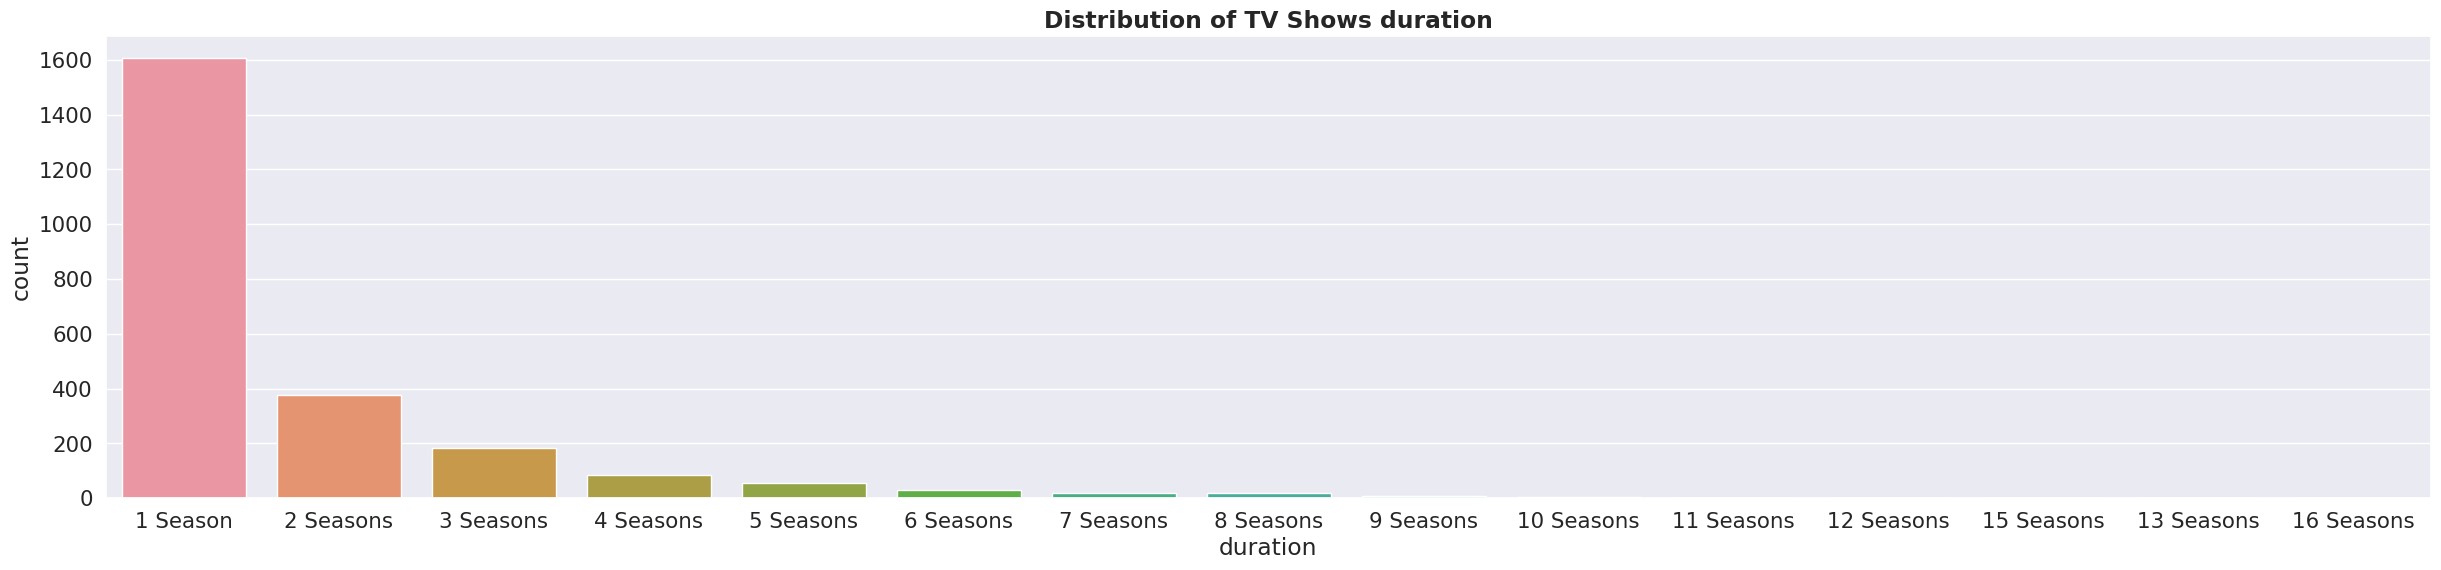

In [47]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)


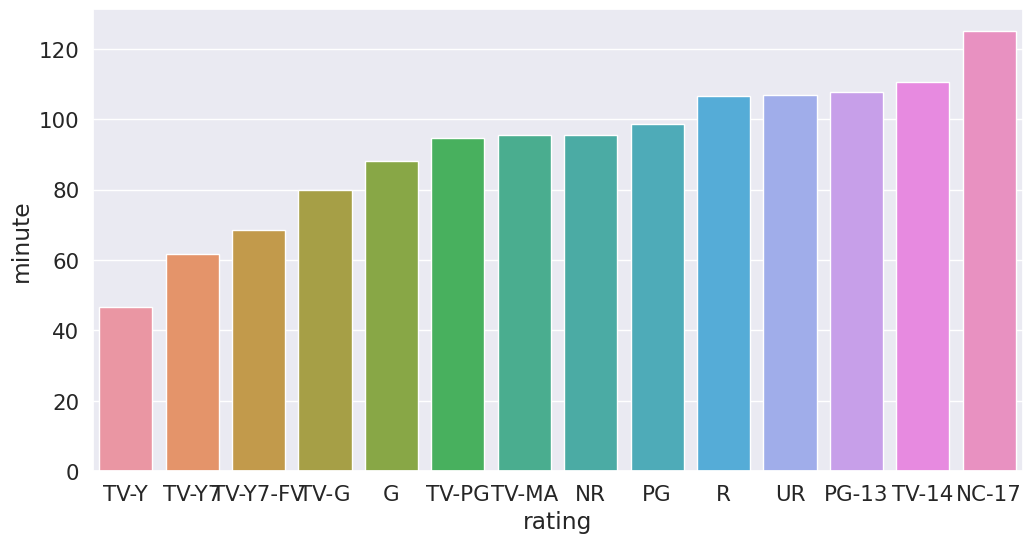

In [48]:
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = movies.groupby(['rating'])['minute'].mean()
duration_df=pd.DataFrame(duration_year).sort_values('minute')
plt.figure(figsize=(12,6))
ax=sns.barplot(x=duration_df.index, y=duration_df.minute)

##### 1. Why did you pick the specific chart?


* Distplot can plot the distribution of a continuous variable, which can help us quickly understand the shape of the distribution, such as whether it is symmetric or skewed, and the location of the central tendency, such as the mean or median.<br>
* The bar graph is used to compare the items between different groups over time. Bar graphs are used to measure the changes over a period of time.
 <br>
* countplot can count the number of occurrences of each category in a categorical variable and plot the counts as bars. This can help you quickly understand the distribution of the data and identify any imbalances or biases.
countplot can also group the counts of different categories and plot them side-by-side, which allows you to compare the frequencies of different categories easily. This is useful when you want to compare the frequency of different categories across a dataset or between different datasets.



##### 2. What is/are the insight(s) found from the chart?

* Most of the movies have duration of between 50 to 150 .
* Highest number of tv_shows consistig of single season .
* Those movies that have a rating of NC-17 have the longest average duration.
* When it comes to movies having a TV-Y rating, they have the shortest runtime on average .

#### Chart - 7- Count Plot on Country with hue Type and Heatmap on Country with hue Target_Ages

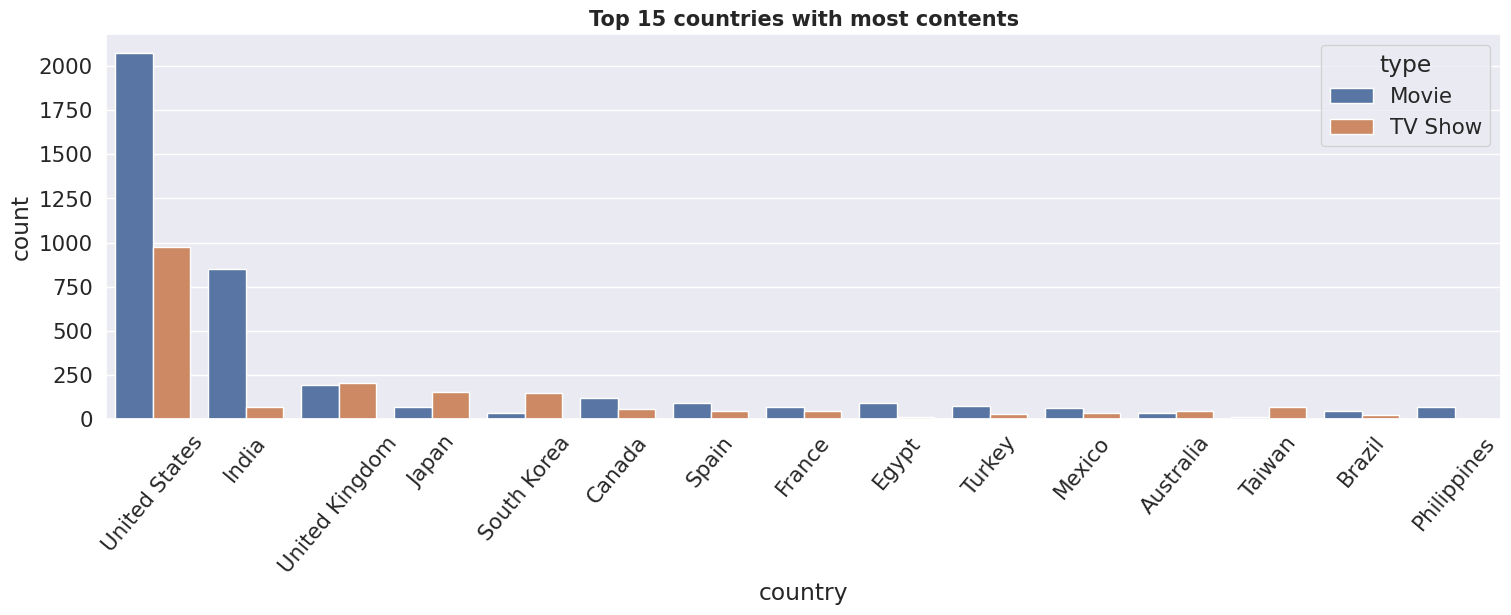

In [49]:
# Analysisng top 15 countries with most content
plt.figure(figsize=(18,5))
sns.countplot(x=df1['country'],hue=df1['type'],order=df1['country'].value_counts().index[0:15])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()
     

In [50]:
country_order = df1['country'].value_counts()[:11].index
country_order

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Egypt', 'Turkey', 'Mexico'],
      dtype='object')

In [51]:
content_data = df1[['type','country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data.T


,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,Mexico
Movie,2076,852,193,69,36,118,89,69,89,73,65
TV Show,975,71,203,155,147,59,45,46,12,27,35
sum,3051,923,396,224,183,177,134,115,101,100,100


In [52]:
# preparing data for heatmap
df1['count'] = 1
data = df1.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']

df_heatmap = df1.loc[df1['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = 'index').T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976


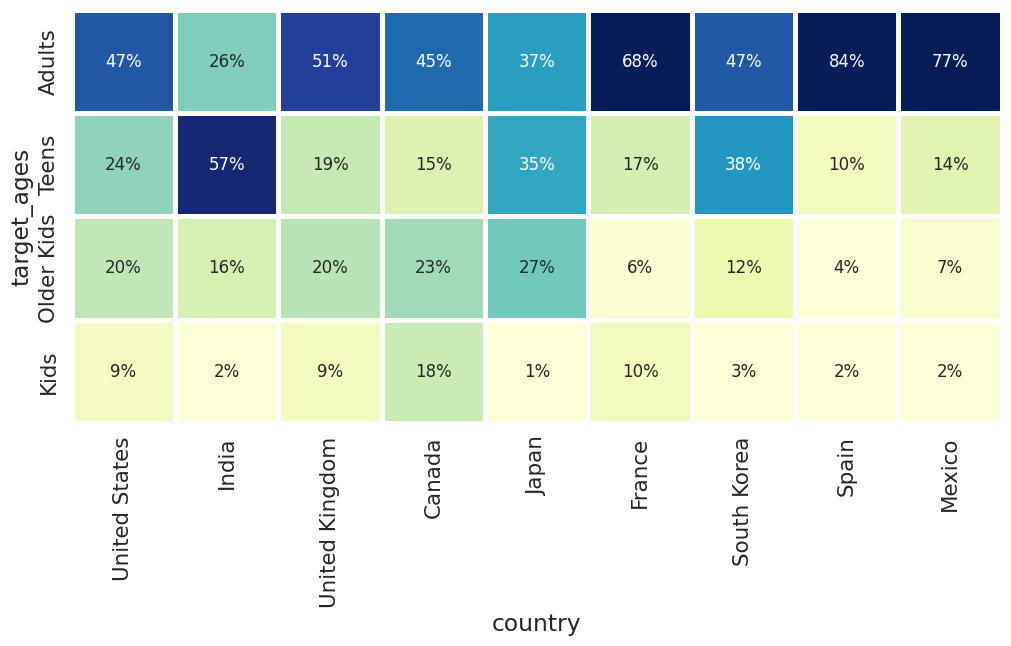

In [53]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

countplot can count the number of occurrences of each category in a categorical variable and plot the counts as bars. This can help you quickly understand the distribution of the data and identify any imbalances or biases. countplot can also group the counts of different categories and plot them side-by-side, which allows you to compare the frequencies of different categories easily. This is useful when you want to compare the frequency of different categories across a dataset or between different datasets.<br>
Heatmaps allow you to quickly identify patterns and trends in your data, making it easier to spot areas of interest or potential problems.

##### 2. What is/are the insight(s) found from the chart?

* Unitated states has the highest number of content on the netflix ,followed by india .<br>
* The US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!
* Also, Mexico and Spain have similar content on Netflix for different age groups.

#### Chart - 8 - Pie Chart on Originals

In [54]:
df1['date_added'] = pd.to_datetime(df1['date_added'])
movies['year_added'] = df1['date_added'].dt.year
df1

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults,10,1
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,3,1
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults,9,1
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids,10,1


Some movies and TV shows were actually released in the past and they were added later on Netflix. But some movies and TV shows were released on Netflix itself. Named those as Netflix Originals.

([<matplotlib.patches.Wedge at 0x7f20648b8940>,
 [Text(-0.8900699117813855, -0.6463555926434588, 'Others'),
  Text(0.9709853583069661, 0.7051151919746822, 'Originals')],
 [Text(-0.48549267915348293, -0.3525575959873411, '69.99%'),
  Text(0.5664081256790635, 0.4113171953185646, '30.01%')])

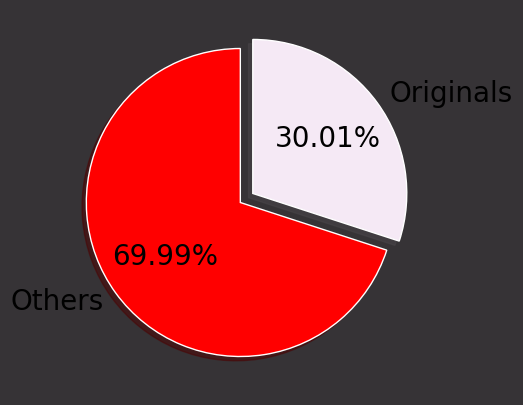

In [55]:
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

##### 1. Why did you pick the specific chart?

Pie charts are used to represent the proportional data or relative data in a single chart. The concept of pie slices is used to show the percentage of a particular data from the whole pie.

Thus, I used to show the percentage of people taken international plan through pie chart with differentr colored area under a circle.

##### 2. What is/are the insight(s) found from the chart?

* 30% movies released on Netflix. 
* 70% movies added on Netflix were released earlier by different mode.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* H0:movies rated for kids and older kids are at least two hours long.
* H1:movies rated for kids and older kids are not at least two hours long.


#### 2. Perform an appropriate statistical test.

In [56]:
#filtering movie from Type_of_show column
df_hypothesis = df1[df1["type"] == "Movie"]

In [57]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

In [58]:
#group_by duration and target_ages                 
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [59]:
#In A and B variable grouping values 
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [60]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [61]:
#t-distribution
stats.t.ppf(0.025,dof)


-1.9620900365868952

In [62]:
#t-distribution
stats.t.ppf(0.975,dof)
     

1.9620900365868947

* Because the t-value is not in the range, the null hypothesis is rejected.
* As a result, movies rated for kids and older kids are not at least two hours long.

### Hypothetical Statement - 2


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* H1:The duration which is more than 90 mins are movies
* H0:The duration which is more than 90 mins are NOT movies



#### 2. Perform an appropriate statistical test.

In [63]:
#making copy of df_clean_frame
df_hypothesis=df1.copy()
#head of df_hypothesis
df_hypothesis.head()
     

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1


In [64]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_

In [65]:
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
df_hypothesis.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1


In [66]:
#group_by duration and TYPE                 
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group
     

,type,duration
0,Movie,99.330417
1,TV Show,1.761468


In [67]:
#In A and B variable grouping values 
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.330417
dtype: float64
Std  duration    1.561099
dtype: float64


In [68]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])
     

5372 2398
dof 7768
SP_2 = duration    252.749896
dtype: float64
SP duration    15.89811
dtype: float64
tvalue 249.88962005047787


In [69]:
#t-distribution
stats.t.ppf(0.025,dof)


-1.9602694215408423

In [70]:

#t-distribution
stats.t.ppf(0.975,dof)

1.9602694215408418

* Because the t-value is not in the range, the null hypothesis is rejected.
* As a result, The duration which is more than 90 mins are movies

## ***6. Feature Engineering & Data Pre-processing***

In [71]:
# Creating a copy of the dataset for further feature engineering
df2 = df1.copy()

### 1. Handling Missing Values

In [72]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df2.isnull().sum())


show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
target_ages     0
month           0
count           0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [73]:
df2.dtypes

show_id                 object
type                  category
title                   object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
target_ages           category
month                    int64
count                    int64
dtype: object

##### What all outlier treatment techniques have you used and why did you use those techniques?

No need to check for outliers . Because of mostly the data is text data .

### 3. Categorical Encoding

In [74]:
# Categorical encoding is not required .

#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical encoding is not required for text . Because we have some other ways to manipulate the data using NLP .

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**There are no text columns in the given dataset which I am working on. So, Skipping this part.**

In [75]:
# pip install nltk

#### 1. Expand Contraction

In [76]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [77]:
df2['description'].astype('str')

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

In [78]:
# after above all the changes, those features are in list format, so making list of description feature
df2['description'] = df2['description'].apply(lambda x: x.split(' '))
df2['description']
     

0       [In, a, future, where, the, elite, inhabit, an...
1       [After, a, devastating, earthquake, hits, Mexi...
2       [When, an, army, recruit, is, found, dead,, hi...
3       [In, a, postapocalyptic, world,, rag-doll, rob...
4       [A, brilliant, group, of, students, become, ca...
                              ...                        
7782    [When, Lebanon's, Civil, War, deprives, Zozo, ...
7783    [A, scrappy, but, poor, boy, worms, his, way, ...
7784    [In, this, documentary,, South, African, rappe...
7785    [Dessert, wizard, Adriano, Zumbo, looks, for, ...
7786    [This, documentary, delves, into, the, mystiqu...
Name: description, Length: 7770, dtype: object

#### 2. Lower Casing

In [79]:
# converting text feature to string from list
df2['description']= df2['description'].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
df2['description']= df2['description'].apply(lambda x: x.lower())
df2['description']

0       in a future where the elite inhabit an island ...
1       after a devastating earthquake hits mexico cit...
2       when an army recruit is found dead, his fellow...
3       in a postapocalyptic world, rag-doll robots hi...
4       a brilliant group of students become card-coun...
                              ...                        
7782    when lebanon's civil war deprives zozo of his ...
7783    a scrappy but poor boy worms his way into a ty...
7784    in this documentary, south african rapper nast...
7785    dessert wizard adriano zumbo looks for the nex...
7786    this documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

#### 3. Removing Punctuations

In [80]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df2['description']= df2['description'].apply(remove_punctuation)

In [81]:
df2['description']

0       in a future where the elite inhabit an island ...
1       after a devastating earthquake hits mexico cit...
2       when an army recruit is found dead his fellow ...
3       in a postapocalyptic world ragdoll robots hide...
4       a brilliant group of students become cardcount...
                              ...                        
7782    when lebanons civil war deprives zozo of his f...
7783    a scrappy but poor boy worms his way into a ty...
7784    in this documentary south african rapper nasty...
7785    dessert wizard adriano zumbo looks for the nex...
7786    this documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

#### 4. Removing Stopwords & Removing White spaces

In [82]:
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')
#Defining stopwords 
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df2['description']=df2['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df2['description'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

#### 5. Text Vectorization

In [83]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
df2['description']

0       future elite inhabit island paradise far crowd...
1       devastating earthquake hits mexico city trappe...
2       army recruit found dead fellow soldiers forced...
3       postapocalyptic world ragdoll robots hide fear...
4       brilliant group students become cardcounting e...
                              ...                        
7782    lebanons civil war deprives zozo family hes le...
7783    scrappy poor boy worms way tycoons dysfunction...
7784    documentary south african rapper nasty c hits ...
7785    dessert wizard adriano zumbo looks next “willy...
7786    documentary delves mystique behind bluesrock t...
Name: description, Length: 7770, dtype: object

In [85]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df2['description'])
X_tfidf.shape

(7770, 5000)

In [86]:
# convert X into array form for clustering
X = X_tfidf.toarray() 

In [ ]:
X

## ***7. ML Model Implementation***

### ML Model - 1 - **Implementing KMeans Clustering**

Finding the optimal number of clusters using the elbow method

Text(0, 0.5, 'wcss_list')

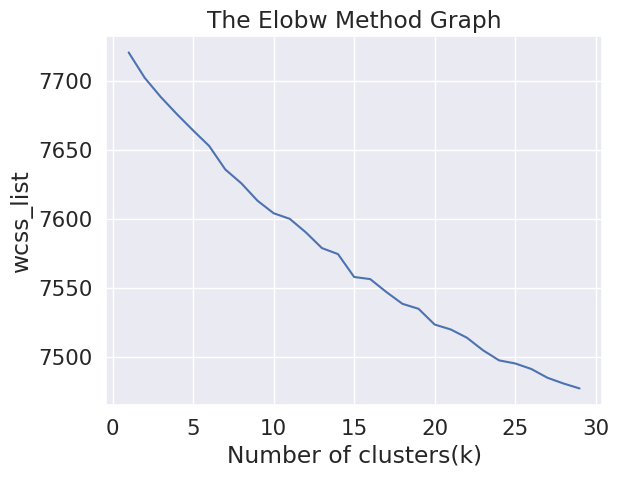

In [88]:

#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 30.  
for i in range(1, 30):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 30), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  

In [95]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters 
sill = [] 
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))
     


cluster: 2 	 Sillhoute: 0.0014
cluster: 3 	 Sillhoute: 0.0016
cluster: 4 	 Sillhoute: 0.0021
cluster: 5 	 Sillhoute: 0.0025
cluster: 6 	 Sillhoute: 0.0034
cluster: 7 	 Sillhoute: 0.0037
cluster: 9 	 Sillhoute: 0.0042
cluster: 10 	 Sillhoute: 0.0045
cluster: 11 	 Sillhoute: 0.0046
cluster: 12 	 Sillhoute: 0.0048
cluster: 13 	 Sillhoute: 0.0051
cluster: 14 	 Sillhoute: 0.0056
cluster: 15 	 Sillhoute: 0.0061
cluster: 16 	 Sillhoute: 0.0063
cluster: 17 	 Sillhoute: 0.0064
cluster: 18 	 Sillhoute: 0.0062
cluster: 19 	 Sillhoute: 0.0063
cluster: 20 	 Sillhoute: 0.0069
cluster: 21 	 Sillhoute: 0.0067
cluster: 22 	 Sillhoute: 0.0069
cluster: 23 	 Sillhoute: 0.0068
cluster: 24 	 Sillhoute: 0.0072
cluster: 25 	 Sillhoute: 0.0073
cluster: 26 	 Sillhoute: 0.0071
cluster: 27 	 Sillhoute: 0.0074
cluster: 28 	 Sillhoute: 0.0074
cluster: 29 	 Sillhoute: 0.0072


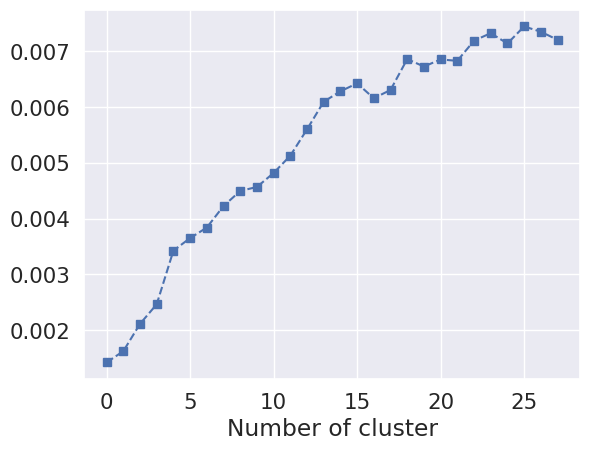

In [101]:
#Plotting Sillhoute's score
plt.plot(sill,'bs--')
plt.xlabel('Number of cluster')
plt.show()
     

From elbow and sillhoute score ,forming 26 number of clusters

In [102]:

#training the K-means model on a dataset  
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X) 

***Evaluation***

In [111]:

#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.007218341785521539


In [112]:
#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

9.193799997853855

In [113]:
#Adding a seperate column for the cluster
df2["cluster"] = y_predict

In [114]:
df2['cluster'].value_counts()

3     2504
2      532
11     331
5      319
18     289
14     284
1      271
7      268
23     234
12     232
10     224
17     223
16     209
8      205
19     192
15     189
21     175
4      158
0      155
24     150
22     140
9      138
20     108
25      89
13      79
6       72
Name: cluster, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

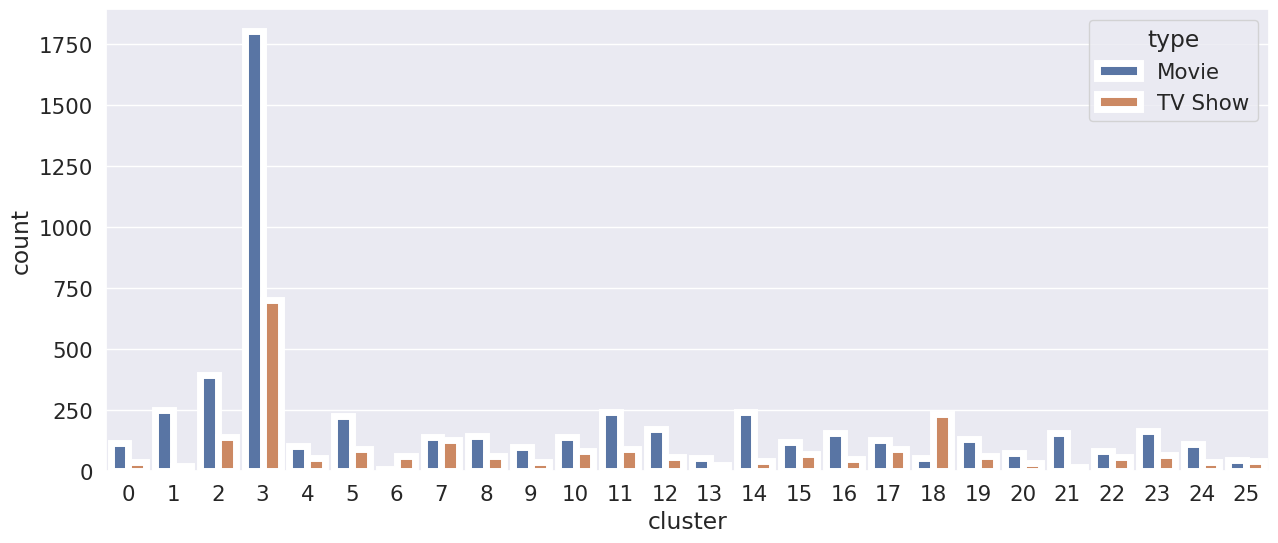

In [115]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=df2, ax=ax)

Cluster 3 has the highest number of datapoints

In [116]:

#SCATTER PLOT FOR CLUSTERS
fig = px.scatter(df2, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

**Dendogram**

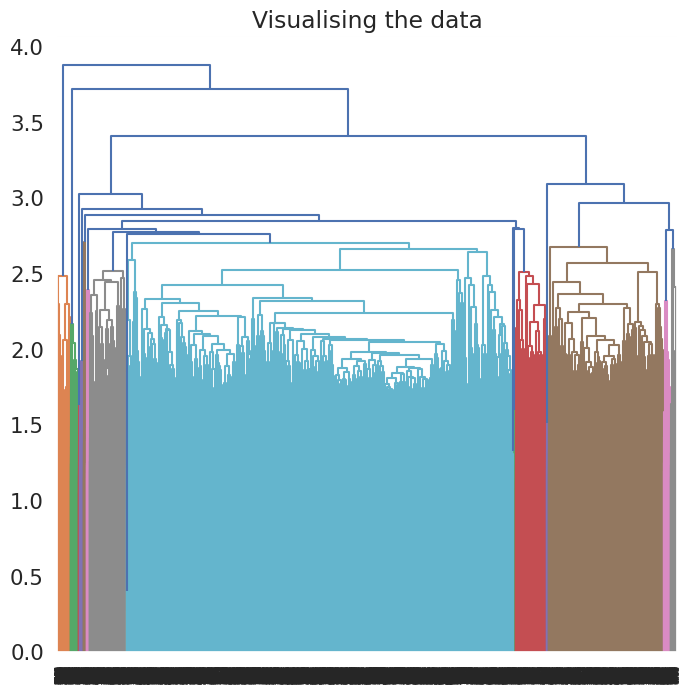

In [117]:

import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

### ML Model - 2 - **Implementing Agglomerative Clustering**

In [118]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)
     


In [119]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,0


**Evaluation**

In [120]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

Silhouette Coefficient: -0.002


In [121]:
#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)
     

13.979382092977453

* The metrics I used to know the best clusters is Silhouette score .
* Because of it is a metric used to evaluate the quality of clustering results. It measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a score closer to 1 indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters, while a score closer to -1 indicates that the object is poorly matched to its own cluster and well-matched to neighboring clusters.

# **Conclusion**

* From elbow and sillhoute score ,optimal of 26 clusters formed , K Means is best for identification than Hierarchical as the evaluation metrics also indicates the same.in kmean cluster 0 has the highest number of datapoints
and evnly distributed for other cluster .

* Netflix has 5372 movies and 2398 TV shows,
there are more number movies on Netflix than TV shows.

* TV-MA has the highest number of ratings for tv shows i,e adult ratings

* Highest number of movies released in 2017 and 2018

* Highest number of movies released in 2020 The number of movies on Netflix is growing significantly faster than the number of TV shows. We saw a huge increase in the number of movies and television episodes after 2015. there is a significant drop in the number of movies and television episodes produced after 2020. It appears that Netflix has focused more attention on increasing Movie content than TV Shows. Movies have increased much more dramatically than TV shows

* The most content is added to Netflix from october to january

* Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies

* Kids tv is the top most TV show genre in netflix

* Most of the movies have duration of between 50 to 150

* Highest number of tv_shows consistig of single season

* Those movies that have a rating of NC-17 have the longest average duration.

* When it comes to movies having a TV-Y rating, they have the shortest runtime on average

* Unitated states has the highest number of content on the netflix ,followed by india

* India has highest number of movies in netflix

* 30% movies released on Netflix.

* 70% movies added on Netflix were released earlier by different mode.